### Results of experiment - May 4

The purpose is to evaluate the performance of a one layer 'Fourier' neural network. More specifically, we want to test how one layer of only sine with bias compares to the use of a combination of sine and cosine activation without bias. Both network have been trained for 5,000 epochs and with 32 and 64 nodes resepecively. Note that because of the inclusion of bias in the latter network makes sure both networks have the same number of parameters. This has been doen for 40 times and for each training, the losses corresponding to the last 10% of the epochs have been recorded. The purpose now is to find out is there is a significant difference in performance. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
experiments_sin = np.loadtxt('PlotsMay4/SinLosses.txt', delimiter=',')
experiments_sincos = np.loadtxt('PlotsMay4/SinCosLosses.txt', delimiter=',')
experiments2_sin = np.loadtxt('PlotsMay4/Exp2SinLosses.txt', delimiter=',')
experiments2_sincos = np.loadtxt('PlotsMay4/Exp2SinCosLosses.txt', delimiter=',')
sincos_winners = 0
sin_means = []
sincos_means = []
sin_mins = []
sincos_mins = []
sincos_means_win = []
sin_means_win = []
for i in range(20):
    print(i)
    sin_mean = np.mean(experiments_sin[i,:])
    sin_means.append(sin_mean)
    sin_min = np.min(experiments_sin[i,:])
    sin_mins.append(sin_min)
    sin_max = np.max(experiments_sin[i,:])
    print('For sine only: Mean = {} - Min = {} - Max = {}'.format(
        sin_mean, sin_min, sin_max))
    sincos_mean = np.mean(experiments_sincos[i,:])
    sincos_means.append(sincos_mean)
    sincos_min = np.min(experiments_sincos[i,:])
    sincos_mins.append(sincos_min)
    sincos_max = np.max(experiments_sincos[i,:])
    print('For sine & cosine: Mean = {} - Min = {} - Max = {}'.format(
        sincos_mean, sincos_min, sincos_max))
    if sincos_mean < sin_mean:
        perc = 100*np.round((sin_mean - sincos_mean)/sin_mean, 4)
        sincos_means_win.append(sincos_mean)
        sin_means_win.append(sin_mean)
        print('Sin Cos was better by {}%'.format(perc))
        sincos_winners += 1
    else:
        perc = 100*np.round((sincos_mean - sin_mean)/sincos_mean, 4)
        print('Sine was better by {}%'.format(perc))
    print('---------------------------------------------')
    sin_mean = np.mean(experiments2_sin[i,:])
    sin_means.append(sin_mean)
    sin_min = np.min(experiments2_sin[i,:])
    sin_mins.append(sin_min)
    sin_max = np.max(experiments2_sin[i,:])
    print('For sine only: Mean = {} - Min = {} - Max = {}'.format(
        sin_mean, sin_min, sin_max))
    sincos_mean = np.mean(experiments2_sincos[i,:])
    sincos_means.append(sincos_mean)
    sincos_min = np.min(experiments2_sincos[i,:])
    sincos_mins.append(sincos_min)
    sincos_max = np.max(experiments2_sincos[i,:])
    print('For sine & cosine: Mean = {} - Min = {} - Max = {}'.format(
        sincos_mean, sincos_min, sincos_max))
    if sincos_mean < sin_mean:
        perc = 100*np.round((sin_mean - sincos_mean)/sin_mean, 4)
        print('Sin Cos was better by {}%'.format(perc))
        sincos_means_win.append(sincos_mean)
        sin_means_win.append(sin_mean)
        sincos_winners += 1
    else:
        perc = 100*np.round((sincos_mean - sin_mean)/sincos_mean, 4)
        print('Sine was better by {}%'.format(perc))
    print('---------------------------------------------')

print(sincos_winners/40)

0
For sine only: Mean = 0.0006440713002521079 - Min = 0.000182087387656793 - Max = 0.0016768435016274452
For sine & cosine: Mean = 0.00043390122419805264 - Min = 0.00014377254410646856 - Max = 0.001180164748802781
Sin Cos was better by 32.629999999999995%
---------------------------------------------
For sine only: Mean = 0.0005280940790544264 - Min = 0.0001859397889347747 - Max = 0.0013467445969581604
For sine & cosine: Mean = 0.015411938907578587 - Min = 0.012273676693439484 - Max = 0.02014220505952835
Sine was better by 96.57%
---------------------------------------------
1
For sine only: Mean = 0.0005099309672368691 - Min = 0.00017403792298864573 - Max = 0.0013366275234147906
For sine & cosine: Mean = 0.00043352906859945504 - Min = 0.00012328515003900975 - Max = 0.0013945287792012095
Sin Cos was better by 14.979999999999999%
---------------------------------------------
For sine only: Mean = 0.0006495995940640569 - Min = 0.0002615680277813226 - Max = 0.00145277613773942
For sine & 

Text(0.5, 1.0, 'Histogram of the means of the losses for both networks')

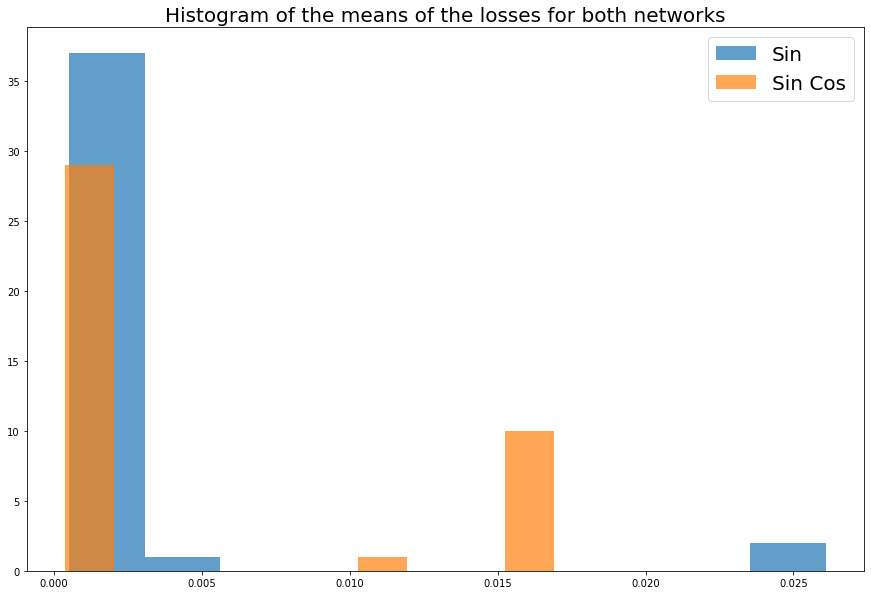

In [13]:
plt.figure(figsize = (15,10))
plt.plot(sin_means, alpha = 0.7, label = 'Sin')
plt.plot(sincos_means, alpha = 0.7, label = 'Sin Cos')
plt.legend(fontsize = 20)
plt.title('Histogram of the means of the losses for both networks',fontsize = 20)

Text(0.5, 1.0, 'Mean error distribution for both networks')

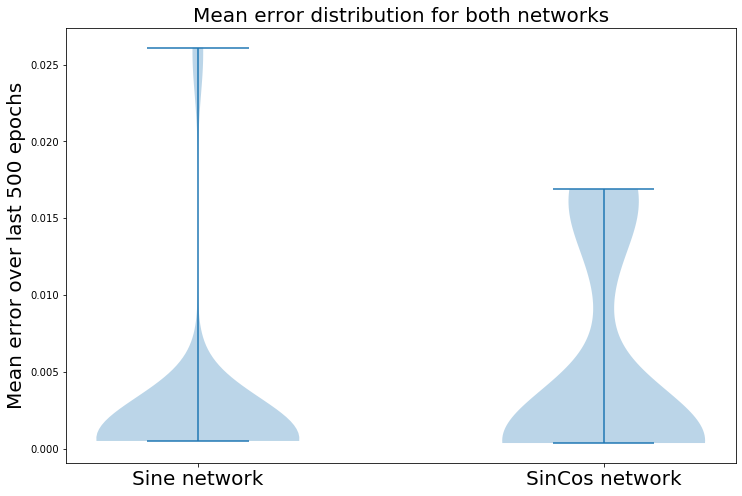

In [10]:
plt.figure(figsize = (12,8))
plt.violinplot([sin_means, sincos_means])
plt.xticks(range(1,3),['Sine network', 'SinCos network'], fontsize = 20)
plt.ylabel('Mean error over last 500 epochs', fontsize = 20)
plt.title('Mean error distribution for both networks', fontsize = 20)

In [14]:
print('Sine:')
print('Mean: {}'.format(np.mean(sin_means)))
print('Std: {}'.format(np.std(sin_means)))
print('Wins : {}%'.format((1 - sincos_winners/40)*100))
print('-----------')
print('Sincos:')
print('Mean: {}'.format(np.mean(sincos_means)))
print('Std: {}'.format(np.std(sincos_means)))
print('Wins : {}%'.format(sincos_winners/40*100))

Sine:
Mean: 0.0019246352823072813
Std: 0.005492399735531839
Wins : 42.50000000000001%
-----------
Sincos:
Mean: 0.004698708026726309
Std: 0.006848100379787273
Wins : 57.49999999999999%


In [19]:
print('Sine:')
print('Mean: {}'.format(np.mean(sin_mins)))
print('Std: {}'.format(np.std(sin_mins)))
print('Wins : {}%'.format((1 - sincos_winners/40)*100))
print('-----------')
print('Sincos:')
print('Mean: {}'.format(np.mean(sincos_mins)))
print('Std: {}'.format(np.std(sincos_mins)))
print('Wins : {}%'.format(sincos_winners/40*100))

Sine:
Mean: 0.0012621195528481621
Std: 0.004455364622912848
Wins : 42.50000000000001%
-----------
Sincos:
Mean: 0.003296316462547111
Std: 0.005338621822398917
Wins : 57.49999999999999%


In [22]:
print('Sine:')
print('Mean: {}'.format(np.mean(sin_means_win)))
print('Std: {}'.format(np.std(sin_means_win)))
print('Wins : {}%'.format((1 - sincos_winners/40)*100))
print('-----------')
print('Sincos:')
print('Mean: {}'.format(np.mean(sincos_means_win)))
print('Std: {}'.format(np.std(sincos_means_win)))
print('Wins : {}%'.format(sincos_winners/40*100))

Sine:
Mean: 0.0027897212363086113
Std: 0.007101432221244405
Wins : 42.50000000000001%
-----------
Sincos:
Mean: 0.000470041966923062
Std: 6.672680223043651e-05
Wins : 57.49999999999999%


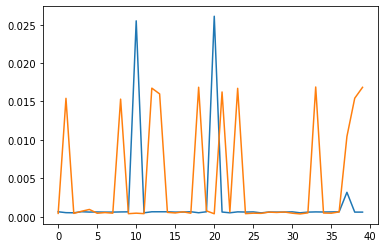

In [16]:
plt.plot(sin_means)
plt.plot(sincos_means)

In [23]:
experiments_sin = np.loadtxt('PlotsMay4/SinLosses.txt', delimiter=',')
experiments_sincos = np.loadtxt('PlotsMay4/SinCosLosses.txt', delimiter=',')
experiments2_sin = np.loadtxt('PlotsMay4/Exp2SinLosses.txt', delimiter=',')
experiments2_sincos = np.loadtxt('PlotsMay4/Exp2SinCosLosses.txt', delimiter=',')
sincos_winners = 0
sin_win_perc = []
sin_win_means = []
sin_win_std = []
sincos_win_perc = []
sincos_win_means = []
sincos_win_std = []

for i in range(20):
    print(i)
    sin_mean = np.mean(experiments_sin[i,:])
    sin_means.append(sin_mean)
    sincos_mean = np.mean(experiments_sincos[i,:])
    if sincos_mean < sin_mean:
        perc = 100*np.round((sin_mean - sincos_mean)/sin_mean, 4)
        sincos_win_means.append(sincos_mean)
        sincos_win_perc.append(perc)
        print('Sin Cos was better by {}%'.format(perc))
        sincos_winners += 1
    else:
        perc = 100*np.round((sincos_mean - sin_mean)/sincos_mean, 4)
        sin_win_means.append(sincos_mean)
        sin_win_perc.append(perc)
        print('Sine was better by {}%'.format(perc))
    print('---------------------------------------------')
    sin_mean = np.mean(experiments2_sin[i,:])
    sin_means.append(sin_mean)
    sincos_mean = np.mean(experiments2_sincos[i,:])
    if sincos_mean < sin_mean:
        perc = 100*np.round((sin_mean - sincos_mean)/sin_mean, 4)
        sincos_win_means.append(sincos_mean)
        sincos_win_perc.append(perc)
        print('Sin Cos was better by {}%'.format(perc))
        sincos_winners += 1
    else:
        perc = 100*np.round((sincos_mean - sin_mean)/sincos_mean, 4)
        sin_win_means.append(sincos_mean)
        sin_win_perc.append(perc)
        print('Sine was better by {}%'.format(perc))
    print('---------------------------------------------')

print(sincos_winners/40)

0
Sin Cos was better by 32.629999999999995%
---------------------------------------------
Sine was better by 96.57%
---------------------------------------------
1
Sin Cos was better by 14.979999999999999%
---------------------------------------------
Sine was better by 8.16%
---------------------------------------------
2
Sine was better by 36.0%
---------------------------------------------
Sin Cos was better by 26.6%
---------------------------------------------
3
Sin Cos was better by 10.08%
---------------------------------------------
Sin Cos was better by 23.57%
---------------------------------------------
4
Sine was better by 95.93%
---------------------------------------------
Sin Cos was better by 37.519999999999996%
---------------------------------------------
5
Sin Cos was better by 98.2%
---------------------------------------------
Sin Cos was better by 21.22%
---------------------------------------------
6
Sine was better by 96.16%
-------------------------------------

In [30]:
np.min(sin_mins)

0.00013875645527150482

In [26]:
np.mean(sincos_win_perc)

27.325652173913046

In [39]:
np.min(experiments_sin)

0.00013875645527150482

In [38]:
np.max(experiments2_sin)

0.00562474736943841